In [8]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criando o dataframe a ser utilizado
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [3]:
# Renomeando as colunas para ptbr
renomear_colunas = {
    'expected_hours' : 'horas_esperadas',
    'price': 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns = renomear_colunas)

In [4]:
# Criando coluna de finalizados ao invés de não finalizado, para facilitar o entendimento:
troca = {
    0:1,
    1:0
}

dados['finalizado'] = dados['nao_finalizado'].map(troca)

In [5]:
# Os modelos do SK Learn, caso não seja definido uma seed, utilizam a seed aleatória do numpy
# Portanto, é possível alterar apenas a seed do numpy para não ter que definir novamente
# a seed dentro de cada modelo

SEED = 20

np.random.seed(SEED)

In [6]:
# Realizando a modelagem

x = dados[['horas_esperadas', 'preco']].values
y = dados['finalizado'].values.ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

modelo = SVC(gamma='auto')
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

acuracia = accuracy_score(y_test, previsoes)

print(acuracia)

0.5888888888888889


<h1>Curvas de decisão</h1>

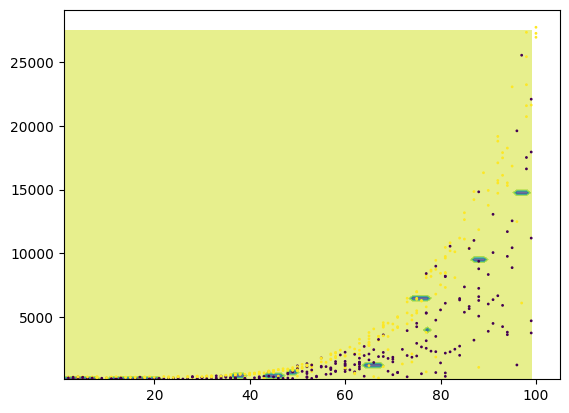

In [7]:
# Criando uma curva de decisão para o modelo, que no caso é uma maquina de vetores de suporte linear

x1_min = x_test[:,0].min()
x1_max = x_test[:,0].max()
x2_min = x_test[:,1].min()
x2_max = x_test[:,1].max()

pixels = 100

eixo_x1 = np.arange(x1_min, x1_max, (x1_max-x1_min)/pixels)
eixo_x2 = np.arange(x2_min, x2_max, (x2_max-x2_min)/pixels)

# Criando um grid:
xx1, xx2 = np.meshgrid(eixo_x1, eixo_x2)
pontos = np.c_[xx1.ravel(), xx2.ravel()]

# Criando previsões do modelo para todos os pontos definidos no grid
Z = modelo.predict(pontos)

# Redimensionando as previsões para o formato do grid
Z = Z.reshape(xx1.shape)

# Criando a visualização gráfica
plt.contourf(xx1, xx2, Z, alpha = 0.5)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=1)

plt.show()

<h1>Padronizando a escala</h1>

In [9]:
# O fato da escala dos eixos ser diferente interfere no desempenho de alguns algoritmos, como é o caso
# das máquinas de vetores de suporte. Portanto, nestes casos, é importante padronizar a escala dos dados
# a serem utilizados

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

modelo_scaled = SVC(gamma='auto')
modelo_scaled.fit(x_train_scaled, y_train)
previsoes_scaled = modelo_scaled.predict(x_test_scaled)

acuracia_scaled = accuracy_score(y_test, previsoes_scaled)

print(acuracia_scaled)

0.7037037037037037


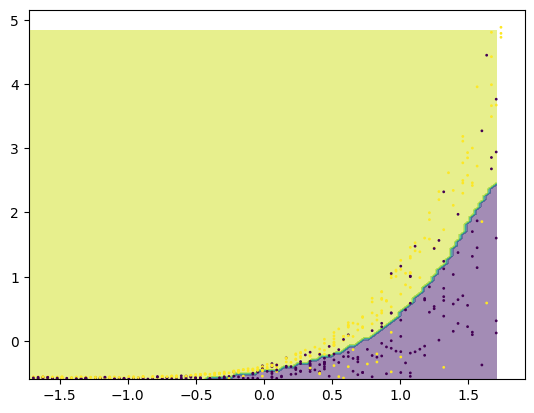

In [11]:
# Refazendo a curva de decisão para comparação

x1_min_s = x_test_scaled[:,0].min()
x1_max_s = x_test_scaled[:,0].max()
x2_min_s = x_test_scaled[:,1].min()
x2_max_s = x_test_scaled[:,1].max()

pixels = 100

eixo_x1_s = np.arange(x1_min_s, x1_max_s, (x1_max_s-x1_min_s)/pixels)
eixo_x2_s = np.arange(x2_min_s, x2_max_s, (x2_max_s-x2_min_s)/pixels)

xx1_s, xx2_s = np.meshgrid(eixo_x1_s, eixo_x2_s)
pontos_s = np.c_[xx1_s.ravel(), xx2_s.ravel()]

Z_s = modelo_scaled.predict(pontos_s)

Z_s = Z_s.reshape(xx1_s.shape)

plt.contourf(xx1_s, xx2_s, Z_s, alpha = 0.5)
plt.scatter(x_test_scaled[:,0], x_test_scaled[:,1], c=y_test, s=1)

plt.show()